In [1]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from getdist import *
import numpy as np
import seaborn as sns
import pandas as pd
import sys

sys.path.append("/home/isidro/Documents/github/simplemc_tests/")
from simplemc.plots.Plot_elipses import plot_elipses

%matplotlib inline

Initalizing nu density look up table... Done


In [2]:
dir_name = "/home/isidro/Documents/github/cosmo_tools/models/genetic_paper/chains/"

root_lcdm_nested = "LCDM_phy_Pantheon+HD+DR16BAO_nested_multi"
cov_lcdm_gadeap = np.loadtxt(dir_name+"LCDM_phy_Pantheon+HD+DR16BAO_ga_deap.cov", delimiter=',')
cov_lcdm_maxlike = np.loadtxt(dir_name+"LCDM_phy_Pantheon+HD+DR16BAO_maxlike_optimization.cov", delimiter=',')

root_cpl_nested = "waCDM_phy_Pantheon+HD+DR16BAO_nested_multi"
cov_cpl_gadeap = np.loadtxt(dir_name+"waCDM_phy_Pantheon+HD+DR16BAO_ga_deap.cov", delimiter=',')
cov_cpl_maxlike = np.loadtxt(dir_name+"waCDM_phy_Pantheon+HD+DR16BAO_maxlike_optimization.cov", delimiter=',')

root_polycdm_nested = "PolyCDM_phy_Pantheon+HD+DR16BAO_nested_multi"
cov_polycdm_gadeap = np.loadtxt(dir_name+"PolyCDM_phy_Pantheon+HD+DR16BAO_ga_deap.cov", delimiter=',')
cov_polycdm_maxlike = np.loadtxt(dir_name+"PolyCDM_phy_Pantheon+HD+DR16BAO_maxlike_optimization.cov", delimiter=',')


## LCDM

-- vals, vecs --  [0.0002918  0.00017325] [[-0.17229628 -0.98504517]
 [ 0.98504517 -0.17229628]]
-- vals, vecs --  [0.00029279 0.00017218] [[-0.16910754 -0.98559761]
 [ 0.98559761 -0.16910754]]
/home/isidro/Documents/github/cosmo_tools/models/genetic_paper/chains/LCDM_phy_Pantheon+HD+DR16BAO_nested_multi_1.txt
Removed 0.1 as burn in


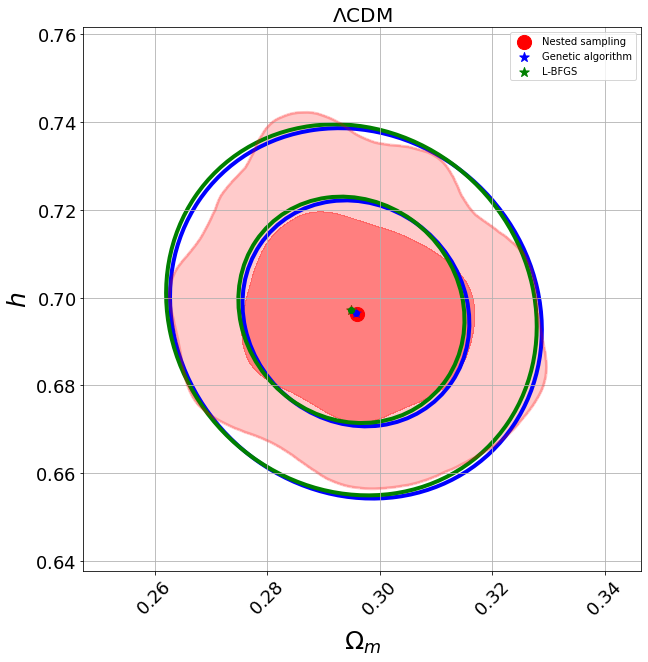

<Figure size 720x576 with 0 Axes>

In [3]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plot_elipses([0.2958, 0.0220, 0.6964], cov_lcdm_gadeap, par1=0, par2=2, par1_Ltx='Om', par2_Ltx='h', 
             ax=ax, contour_col='b', axis_sty='-b')
plot_elipses([0.2950, 0.0220, 0.6972], cov_lcdm_maxlike, par1=0, par2=2, par1_Ltx='Om', par2_Ltx='h', 
             ax=ax, contour_col='g', axis_sty='-g')


ax.scatter(0.2960, 0.6963, marker='o', s=200, c='red', label='Nested sampling')
ax.scatter(0.2958, 0.6964, marker='*', s=100, c='blue', label='Genetic algorithm')
ax.scatter(0.2950, 0.6972, marker='*', s=100, c='green', label='L-BFGS')

gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.5,
                                             'smooth_scale_1D': 0.5, 
                                             'ignore_rows': 0.1}, )

gg.settings.lab_fontsize = 25
gg.settings.x_label_rotation= 45
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 18 
gg.settings.linewidth_meanlikes = 5
gg.settings.linewidth_contour = 1


# plt.figure(figsize=(10,8))
gg.plot_2d(root_lcdm_nested, 'Om', 'h', colors=['red'], 
           filled=True, alphas = [0.5], legend_loc='upper right', ax=ax)

ax.legend()
ax.grid()
ax.set_title('$\Lambda$CDM', fontsize=20)
fig.savefig('lcdm_genetic.png')

### LCDM stats 

In [4]:
mc_samp = mcsamples.loadMCSamples(dir_name +'/'+ root_lcdm_nested, settings={'ignore_rows':0.0})
mcsamplefile = mc_samp
mcstats = mcsamplefile.getLikeStats()
summary = mcstats.likeSummary()
print(summary)
print("-2loglike: {:.8}".format(2*mcstats.logLike_sample))

/home/isidro/Documents/github/cosmo_tools/models/genetic_paper/chains/LCDM_phy_Pantheon+HD+DR16BAO_nested_multi_1.txt
Removed no burn in
Best fit sample -log(Like) = 524.622227
mean(-Ln(like)) = 526.039886
-Ln(mean like)  = 525.602343

-2loglike: 1049.2445


## CPL

-- vals, vecs --  [0.00087058 0.0002743 ] [[ 0.58269931 -0.81268783]
 [ 0.81268783  0.58269931]]
-- vals, vecs --  [0.00088905 0.00027135] [[ 0.59432975 -0.80422145]
 [ 0.80422145  0.59432975]]
/home/isidro/Documents/github/cosmo_tools/models/genetic_paper/chains/waCDM_phy_Pantheon+HD+DR16BAO_nested_multi_1.txt
Removed 0.1 as burn in


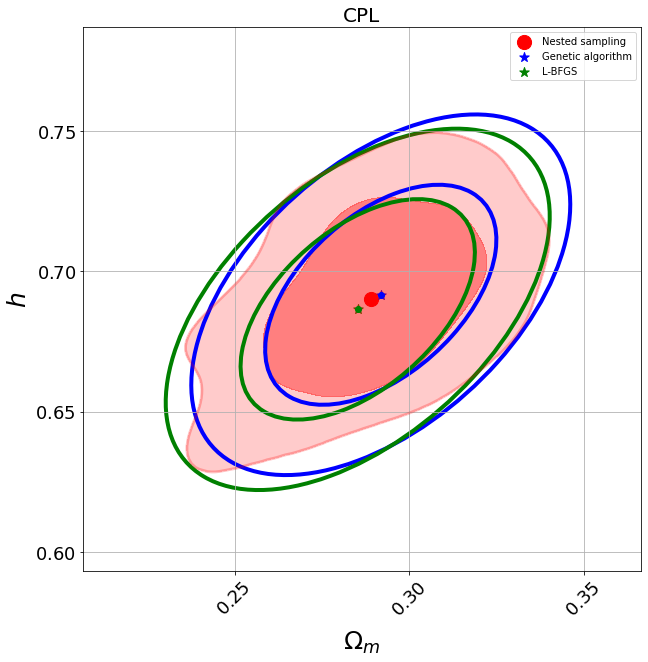

<Figure size 720x576 with 0 Axes>

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plot_elipses([0.2919, 0.0220, 0.6916, -0.9803, 0.0330], cov_cpl_gadeap, par1=0, par2=2, par1_Ltx='Om', par2_Ltx='h', 
             ax=ax, contour_col='b', axis_sty='-b')
plot_elipses([0.2853, 0.0220, 0.6864, -1.0082, 0.2556], cov_cpl_maxlike, par1=0, par2=2, par1_Ltx='Om', par2_Ltx='h', 
             ax=ax, contour_col='g', axis_sty='-g')


ax.scatter(0.2892, 0.6901, marker='o', s=200, c='red', label='Nested sampling')
ax.scatter(0.2919, 0.6916, marker='*', s=100, c='blue', label='Genetic algorithm')
ax.scatter(0.2853, 0.6864, marker='*', s=100, c='green', label='L-BFGS')

gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.5,
                                             'smooth_scale_1D': 0.5, 
                                             'ignore_rows': 0.1}, )

gg.settings.lab_fontsize = 25
gg.settings.x_label_rotation= 45
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 18 
gg.settings.linewidth_meanlikes = 5
gg.settings.linewidth_contour = 1


# plt.figure(figsize=(10,8))
gg.plot_2d(root_cpl_nested, 'Om', 'h', colors=['red'], 
           filled=True, alphas = [0.5], legend_loc='upper right', ax=ax)

ax.legend()
ax.grid()
ax.set_title('CPL', fontsize=20)
fig.savefig('cpl_genetic.png')

-- vals, vecs --  [0.36918882 0.00336618] [[-0.11642706 -0.99319924]
 [ 0.99319924 -0.11642706]]
-- vals, vecs --  [0.27276002 0.00340628] [[-0.1164089  -0.99320137]
 [ 0.99320137 -0.1164089 ]]


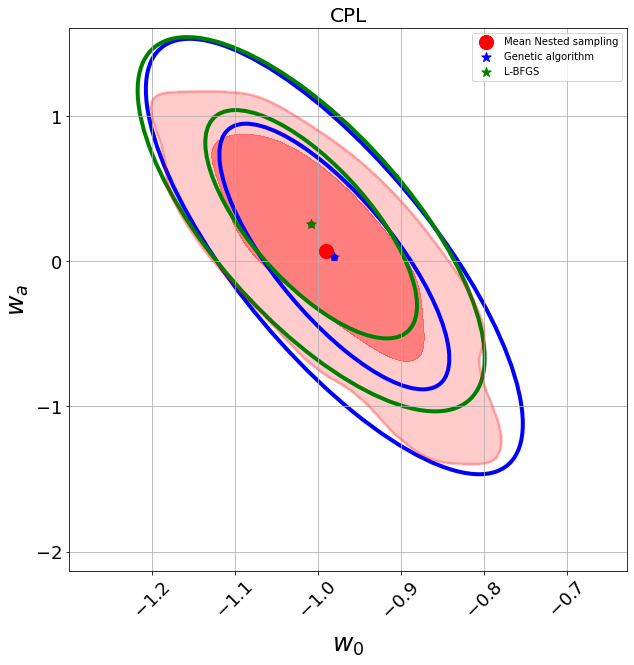

<Figure size 720x576 with 0 Axes>

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plot_elipses([0.2919, 0.0220, 0.6916, -0.9803, 0.0330], cov_cpl_gadeap, par1=3, par2=4, par1_Ltx='$w_0$', par2_Ltx='$w_a$', 
             ax=ax, contour_col='b', axis_sty='-b')
plot_elipses([0.2853, 0.0220, 0.6864, -1.0082, 0.2556], cov_cpl_maxlike, par1=3, par2=4, par1_Ltx='$w_0$', par2_Ltx='$w_a$', 
             ax=ax, contour_col='g', axis_sty='-g')


ax.scatter(-0.9909, 0.0679, marker='o', s=200, c='red', label='Mean Nested sampling')
ax.scatter(-0.9803, 0.0330, marker='*', s=100, c='blue', label='Genetic algorithm')
ax.scatter(-1.0082, 0.2556, marker='*', s=100, c='green', label='L-BFGS')

gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.5,
                                             'smooth_scale_1D': 0.5, 
                                             'ignore_rows': 0.1}, )

gg.settings.lab_fontsize = 25
gg.settings.x_label_rotation= 45
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 18 
gg.settings.linewidth_meanlikes = 5
gg.settings.linewidth_contour = 1


# plt.figure(figsize=(10,8))
gg.plot_2d(root_cpl_nested, 'w', 'wa', colors=['red'], 
           filled=True, alphas = [0.5], legend_loc='upper right', ax=ax)

ax.legend()
ax.grid()
ax.set_title('CPL', fontsize=20)
fig.savefig('cpl2_genetic.png')

### CPL stats

In [7]:
mc_samp = mcsamples.loadMCSamples(dir_name +'/'+ root_cpl_nested, settings={'ignore_rows':0.0})
mcsamplefile = mc_samp
mcstats = mcsamplefile.getLikeStats()
summary = mcstats.likeSummary()
print(summary)
print("-2loglike: {:.8}".format(2*mcstats.logLike_sample))

/home/isidro/Documents/github/cosmo_tools/models/genetic_paper/chains/waCDM_phy_Pantheon+HD+DR16BAO_nested_multi_1.txt
Removed no burn in
Best fit sample -log(Like) = 524.470734
mean(-Ln(like)) = 526.927057
-Ln(mean like)  = 526.194959

-2loglike: 1048.9415


## PolyCDM

-- vals, vecs --  [0.00134947 0.00031725] [[-0.72787361  0.68571131]
 [-0.68571131 -0.72787361]]
-- vals, vecs --  [0.00132969 0.00031335] [[-0.72006111  0.69391066]
 [-0.69391066 -0.72006111]]
/home/isidro/Documents/github/cosmo_tools/models/genetic_paper/chains/PolyCDM_phy_Pantheon+HD+DR16BAO_nested_multi_1.txt
Removed 0.1 as burn in


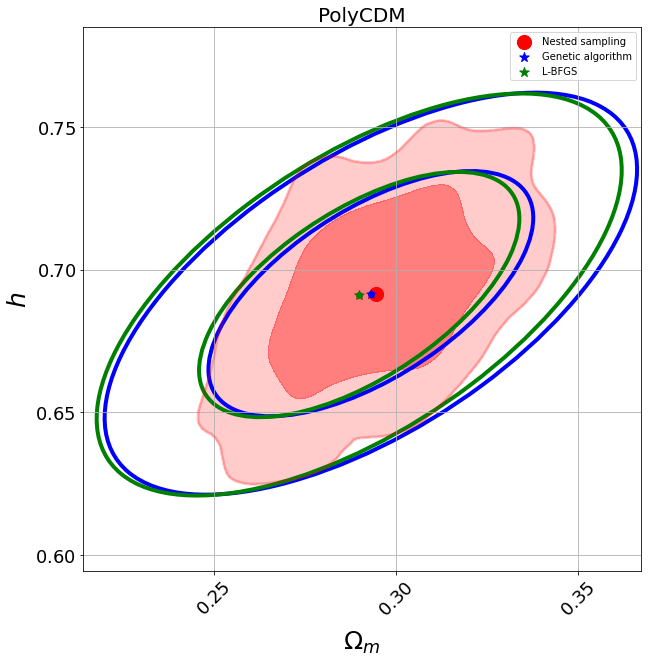

<Figure size 720x576 with 0 Axes>

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plot_elipses([0.2931, 0.0220, 0.6916, 0.0947, -0.0147, 0.0076], cov_polycdm_gadeap, par1=0, par2=2, par1_Ltx='Om', par2_Ltx='h', 
             ax=ax, contour_col='b', axis_sty='-b')
plot_elipses([0.2899, 0.0220,  0.6913, 0.0150, 0.0136, -0.0013], cov_polycdm_maxlike, par1=0, par2=2, par1_Ltx='Om', par2_Ltx='h', 
             ax=ax, contour_col='g', axis_sty='-g')


ax.scatter(0.2945, 0.6916, marker='o', s=200, c='red', label='Nested sampling')
ax.scatter(0.2931, 0.6916, marker='*', s=100, c='blue', label='Genetic algorithm')
ax.scatter(0.2899, 0.6913, marker='*', s=100, c='green', label='L-BFGS')

gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.4,
                                             'smooth_scale_1D': 0.4, 
                                             'ignore_rows': 0.1}, )

gg.settings.lab_fontsize = 25
gg.settings.x_label_rotation= 45
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 18 
gg.settings.linewidth_meanlikes = 5
gg.settings.linewidth_contour = 1


# plt.figure(figsize=(10,8))
gg.plot_2d(root_polycdm_nested, 'Om', 'h', colors=['red'], 
           filled=True, alphas = [0.5], legend_loc='upper right', ax=ax)

ax.legend()
ax.grid()
ax.set_title('PolyCDM', fontsize=20)
fig.savefig('polycdm_genetic.png')

-- vals, vecs --  [0.21843349 0.00429151] [[-0.91206959 -0.41003544]
 [ 0.41003544 -0.91206959]]
-- vals, vecs --  [0.21652713 0.00427587] [[-0.9124788  -0.40912399]
 [ 0.40912399 -0.9124788 ]]


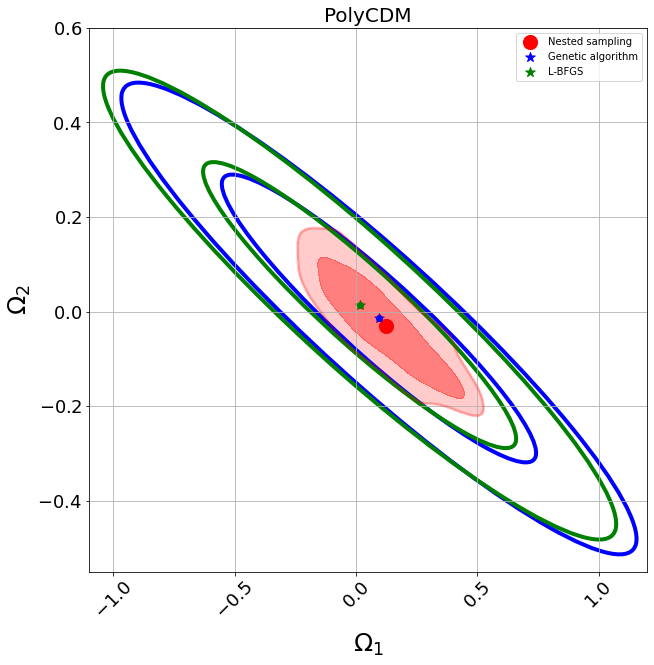

<Figure size 720x576 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plot_elipses([0.2931, 0.0220, 0.6916, 0.0947, -0.0147, 0.0076], cov_polycdm_gadeap, par1=3, par2=4, 
             par1_Ltx='$\Omega_1$', par2_Ltx='$\Omega_2$', 
             ax=ax, contour_col='b', axis_sty='-b')
plot_elipses([0.2899, 0.0220,  0.6913, 0.0150, 0.0136, -0.0013], cov_polycdm_maxlike, par1=3, par2=4,
             par1_Ltx='$\Omega_1$', par2_Ltx='$\Omega_2$', 
             ax=ax, contour_col='g', axis_sty='-g')


ax.scatter(0.1232, -0.0298, marker='o', s=200, c='red', label='Nested sampling')
ax.scatter(0.0947, -0.0147, marker='*', s=100, c='blue', label='Genetic algorithm')
ax.scatter(0.0150, 0.0136, marker='*', s=100, c='green', label='L-BFGS')

gg= plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.4,
                                             'smooth_scale_1D': 0.4, 
                                             'ignore_rows': 0.1}, )

gg.settings.lab_fontsize = 25
gg.settings.x_label_rotation= 45
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 18 
gg.settings.linewidth_meanlikes = 5
gg.settings.linewidth_contour = 1


# plt.figure(figsize=(10,8))
gg.plot_2d(root_polycdm_nested, 'Om1', 'Om2', colors=['red'], 
           filled=True, alphas = [0.5], legend_loc='upper right', ax=ax)

ax.legend()
ax.grid()
ax.set_ylim(-0.55, 0.6)
ax.set_xlim(-1.1, 1.2)
ax.set_title('PolyCDM', fontsize=20)
fig.savefig('polycdm2_genetic.png')

In [10]:
mc_samp = mcsamples.loadMCSamples(dir_name +'/'+ root_polycdm_nested, settings={'ignore_rows':0.0})
mcsamplefile = mc_samp
mcstats = mcsamplefile.getLikeStats()
summary = mcstats.likeSummary()
print(summary)
print("-2loglike: {:.8}".format(2*mcstats.logLike_sample))

/home/isidro/Documents/github/cosmo_tools/models/genetic_paper/chains/PolyCDM_phy_Pantheon+HD+DR16BAO_nested_multi_1.txt
Removed no burn in
Best fit sample -log(Like) = 524.564302
mean(-Ln(like)) = 526.517147
-Ln(mean like)  = 525.933787

-2loglike: 1049.1286


## Graduated using only BBAO+HD+SN

In [11]:
# \psi \equiv -3\gamma (\lambda -1)
def gamma_to_psi(gamma_vals):
    glambda = -20
    psi = -3*gamma_vals*(glambda-1)
    return psi

### Escamilla's MCMC chains and new nested/ga_deap/maxlike outputs based on HD+SN+BBAO+Planck_15 and $\lambda = -20$ 

/home/isidro/Documents/github/cosmo_tools/models/genetic_paper/chains_graduated_LE/Grad_nega_20_phy_Planck_15+BBAO+SN+HD_1.txt
Removed 0.1 as burn in


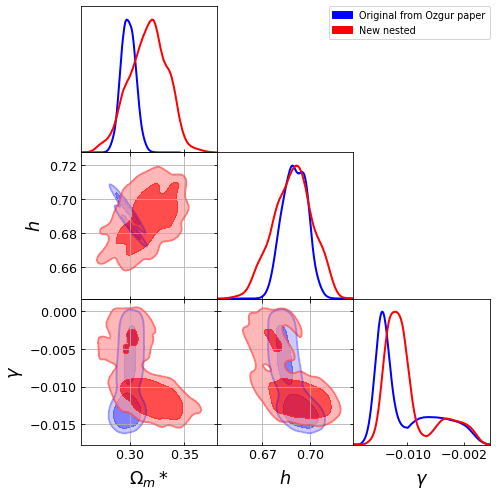

In [12]:
dir_name_le = '/home/isidro/Documents/github/cosmo_tools/models/genetic_paper/chains_graduated_LE/'
root_le = 'Grad_nega_20_phy_Planck_15+BBAO+SN+HD'
root_ga = 'Grad_phy_HD+BBAO_ga_deap'


root_new = 'Grad_phy_HD+BBAO+SN_nested_multi' # working
# root_new = 'Grad_phy_HD+SN+BBAO+Planck_15_mcmc' # No!

roots = [root_le, root_new]


g= plots.getSubplotPlotter(chain_dir = dir_name_le,width_inch=7, 
                            analysis_settings={'smooth_scale_2D': 0.3, 'smooth_scale_1D': 0.3, 'ignore_rows': 0.1})
g.settings.axes_fontsize = 15
g.settings.lab_fontsize = 20
g.settings.colorbar_axes_fontsize=20
g.settings.colorbar_label_rotation= 0
g.settings.alpha_filled_add =0.9
g.settings.scatter_size = 9
g.settings.lw_contour=3
g.settings.colormap_scatter= 'hsv'
g.triangle_plot(roots, 
                 ['Om','h','ggama'], 
                  contour_args=[{'lw':3, 'color':'blue', 'ls':'-'}, 
                              {'lw':2, 'color':'red', 'ls':'-'}, 
                              {'lw':2, 'color':'green', 'ls':'-'},
                              {'lw':2, 'color':'gray', 'ls':'-'}], filled=True,
                alphas=[0.5, 0.7, 0.8, 0.9], legend_labels= ['Original from Ozgur paper', 'New nested'], 
                line_args=[{'lw':2, 'color':'blue'}, {'lw':2, 'color':'red', 'ls':'-'}, 
                {'lw':2, 'color':'green'}, {'lw':2, 'color':'gray'}], contour_colors=['blue','red', 'green', 'gray'])
                #,plot_3d_with_param='alpha')

    
g.subplots[1,0].grid(True)
g.subplots[2,0].grid(True)
# g.subplots[3,0].grid(True)
g.subplots[2,1].grid(True)
# g.subplots[3,1].grid(True)
# g.subplots[3,2].grid(True)

# g.subplots[1,0].set_ylim(-0.5, 1.5)
# # 
# g.subplots[1,1].set_xlim(-0.05, 1.8)

# g.subplots[0,0].set_title('Phantom', fontsize=20)
# g.export('Phantom2.pdf')
# plt.title('Graduated with HD+SN+BAO+Planck', )

(0.25, 0.4)

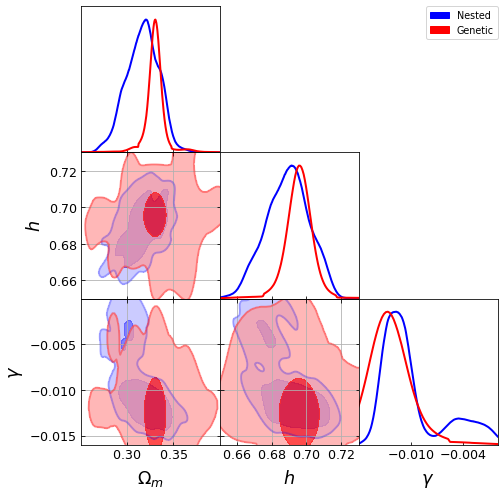

In [13]:
dir_name_le = '/home/isidro/Documents/github/cosmo_tools/models/genetic_paper/chains_graduated_LE/'
root_ga = 'Grad_phy_HD+BBAO_ga_deap'
root_new = 'Grad_phy_HD+BBAO+SN_nested_multi' # working
# root_new = 'Grad_phy_HD+SN+BBAO+Planck_15_mcmc' # No!

roots = [root_new, root_ga]


g= plots.getSubplotPlotter(chain_dir = dir_name_le,width_inch=7, 
                            analysis_settings={'smooth_scale_2D': 0.3, 'smooth_scale_1D': 0.3, 'ignore_rows': 0.1})
g.settings.axes_fontsize = 15
g.settings.lab_fontsize = 20
g.settings.colorbar_axes_fontsize=20
g.settings.colorbar_label_rotation= 0
g.settings.alpha_filled_add =0.9
g.settings.scatter_size = 9
g.settings.lw_contour=3
g.settings.colormap_scatter= 'hsv'
g.triangle_plot(roots, 
                 ['Om','h','ggama'], 
                  contour_args=[{'lw':3, 'color':'blue', 'ls':'-'}, 
                              {'lw':2, 'color':'red', 'ls':'-'}, 
                              {'lw':2, 'color':'green', 'ls':'-'},
                              {'lw':2, 'color':'gray', 'ls':'-'}], filled=True,
                alphas=[0.5, 0.7, 0.8, 0.9], legend_labels= ['Nested', 'Genetic'], 
                line_args=[{'lw':2, 'color':'blue'}, {'lw':2, 'color':'red', 'ls':'-'}, 
                {'lw':2, 'color':'green'}, {'lw':2, 'color':'gray'}], contour_colors=['blue','red', 'green', 'gray'])
                #,plot_3d_with_param='alpha')

    
g.subplots[1,0].grid(True)
g.subplots[2,0].grid(True)
# g.subplots[3,0].grid(True)
g.subplots[2,1].grid(True)

# g.subplots[3,1].grid(True)
# g.subplots[3,2].grid(True)

g.subplots[1,0].set_ylim(0.65, 0.73)
g.subplots[2,0].set_ylim(-0.016, 0)
g.subplots[2,0].set_xlim(0.25, 0.4)

# g.subplots[0,0].set_title('Phantom', fontsize=20)
# g.export('Phantom2.pdf')
# plt.title('Graduated with HD+SN+BAO+Planck', )

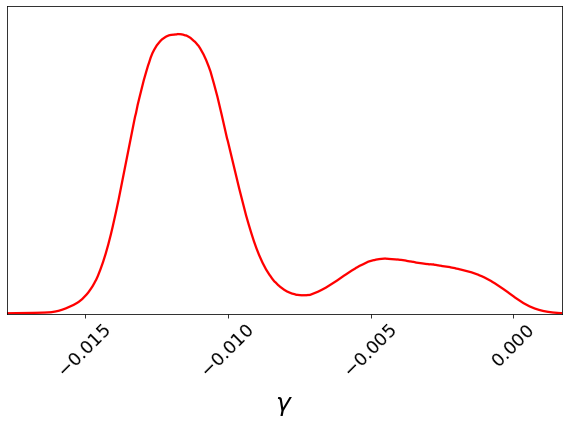

In [14]:
g = plots.get_single_plotter(width_inch=8,
                             analysis_settings={'smooth_scale_2D': 0.3, 'smooth_scale_1D': 0.3, 'ignore_rows': 0.1} )

g.settings.lab_fontsize = 25
g.settings.x_label_rotation= 45
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 18 
g.settings.linewidth_meanlikes = 5
g.settings.linewidth_contour = 1

g.plot_1d([dir_name_le+root_new], 'ggama', colors=['red'])
plt.savefig('graduated_gamma1d_nested.png', dpi=100)

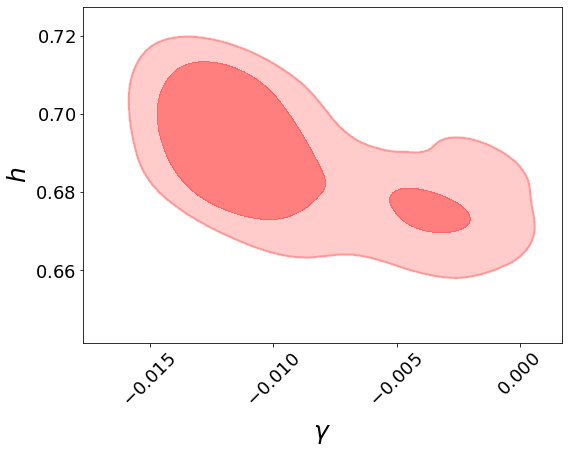

In [15]:
gg= plots.getSinglePlotter(chain_dir = dir_name_le, width_inch= 8,
                          ratio = 0.8, 
                          analysis_settings={'smooth_scale_2D': 0.5,
                                             'smooth_scale_1D': 0.5, 
                                             'ignore_rows': 0.1}, )

gg.settings.lab_fontsize = 25
gg.settings.x_label_rotation= 45
gg.settings.legend_fontsize = 15
gg.settings.axes_fontsize = 18 
gg.settings.linewidth_meanlikes = 5
gg.settings.linewidth_contour = 1


# plt.figure(figsize=(10,8))
gg.plot_2d(root_new, 'ggama', 'h', colors=['red'], 
           filled=True, alphas = [0.5], legend_loc='upper right')
plt.savefig('graduated_hvsgamma2d_nested.png', dpi=100)

In [16]:
data_le1 = np.loadtxt(dir_name_le+"Grad_phy_HD+BBAO+SN_nested_multi_1.txt")
data_le2 = np.loadtxt(dir_name_le+"Grad_phy_HD+BBAO+SN_ga_deap_1.txt", delimiter=' ')

In [17]:
np.shape(data_le1)

(1687, 15)

(-0.02, 0.0)

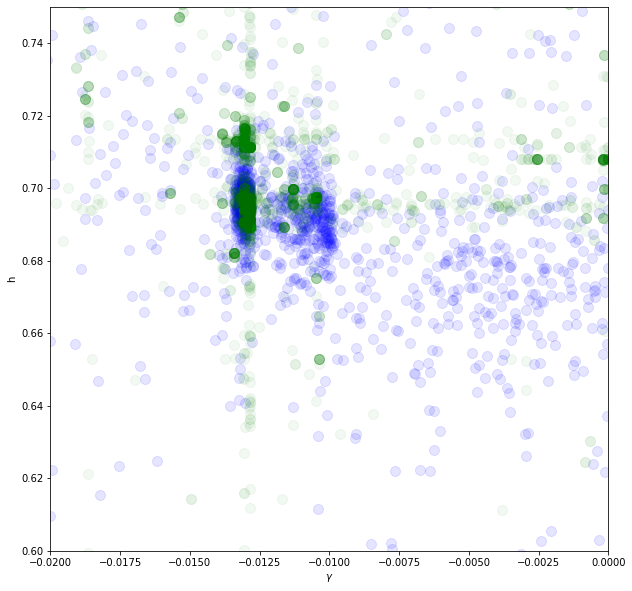

In [18]:
#h0 vs gamma
fig = plt.figure(figsize=(10, 10))
plt.scatter(data_le1[:,5], data_le1[:,4], label='nested', marker='o', alpha=0.1, color='b', s=100)
plt.scatter(data_le2[:,5], data_le2[:,4], label='genetic', marker='o', alpha=0.05, color='g', s=100)
plt.ylabel('h')
plt.xlabel('$\gamma$')

plt.ylim(0.6, 0.75)
plt.xlim(-0.02, 0)

/home/isidro/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/isidro/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


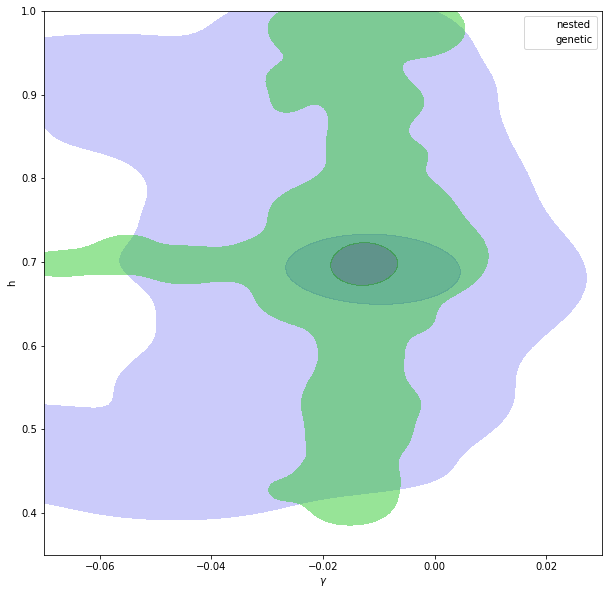

In [19]:
fig = plt.figure(figsize=(10, 10))

sns.kdeplot(data_le1[:,5], data_le1[:,4], label='nested', color='b', levels=3, shade=True, alpha=0.6)
sns.kdeplot(data_le2[:,5], data_le2[:,4], label='genetic', color='g', levels=3, shade=True, alpha=0.5)

plt.ylabel('h')
plt.xlabel('$\gamma$')

plt.ylim(0.35, 1)
plt.xlim(-0.07, 0.03)
plt.legend()
# plt.xlim(-0.06, 0.04)

Text(0.5, 0, '$\\psi$')

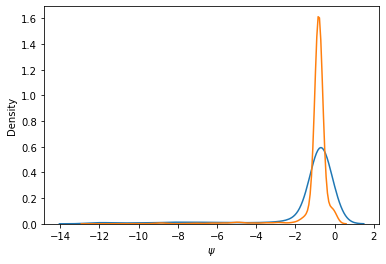

In [20]:
fig, ax = plt.subplots()

sns.kdeplot(gamma_to_psi(data_le1[:,5]), label='nested', ax=ax)
sns.kdeplot(gamma_to_psi(data_le2[:,5]), label='genetic', ax=ax)

# plt.xlabel('$\psi$')
plt.xlabel('$\psi$')

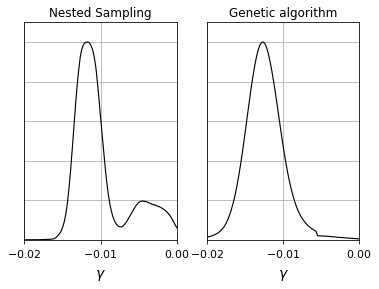

<Figure size 288x216 with 0 Axes>

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
g = plots.get_single_plotter(width_inch=4, 
                             analysis_settings={'smooth_scale_1D': 0.3, 'ignore_rows': 0.1})

g.plot_1d(dir_name_le+root_new, 'ggama', ax=ax1)

# df1 = pd.DataFrame(data1[:,3]).plot(kind='density', ax= ax)

# pd.DataFrame(data2[:,3]).plot(kind='density', ax= ax, label='genetic')

# kdeplot = sns.histplot(data2[:,3], label='genetic', stat='density')
# kdeplot = sns.histplot(data_le2[:,5], label='genetic', ax=ax2, bins=200)
g.plot_1d(dir_name_le+root_ga, 'ggama', ax=ax2)

ax2.set_xlabel('$\gamma$')
# ax2.set_yticks([])
# ax2.set_ylabel('')

ax1.axis(xmin=-0.02, xmax=0.0)
ax2.axis(xmin=-0.02, xmax=0.0)

ax1.set_title('Nested Sampling')
ax2.set_title('Genetic algorithm')

ax1.grid()
ax2.grid()

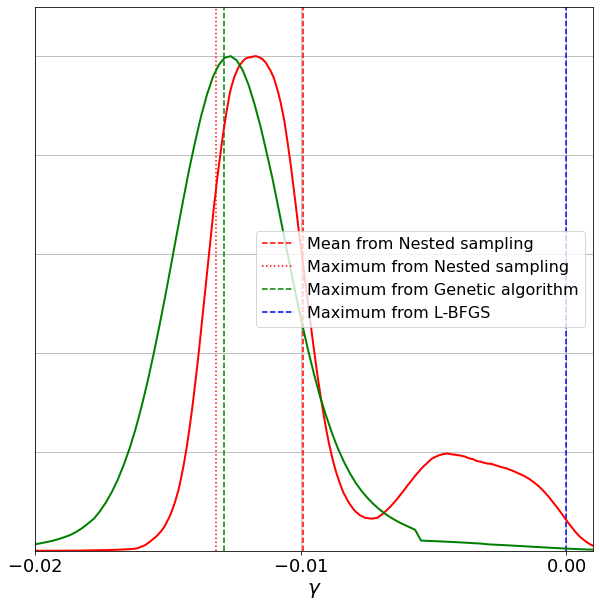

<Figure size 288x216 with 0 Axes>

In [35]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111)


g = plots.get_single_plotter(width_inch=4, 
                             analysis_settings={'smooth_scale_1D': 0.3, 'ignore_rows': 0.1})

g.plot_1d([dir_name_le+root_new, dir_name_le+root_ga], 'ggama', legend_labels=['Nested sampling', 'Genetic'], ax=ax, 
                line_args=[{'lw':2, 'color':'red'}, {'lw':2, 'color':'green'}])

    
# g.subplots[1,0].grid(True)
# g.subplots[2,0].grid(True)
# # g.subplots[3,0].grid(True)
# g.subplots[2,1].grid(True)

# g.subplots[3,1].grid(True)
# g.subplots[3,2].grid(True)
ax.vlines(x=-0.0099, ymin=0, ymax=1.2, color='red', linestyles='dashed', label='Mean from Nested sampling')
ax.vlines(x=-1.3201200E-02 , ymin=0, ymax=1.2, color='red', linestyles=':', label='Maximum from Nested sampling')
ax.vlines(x=-0.0129, ymin=0, ymax=1.2, color='green', linestyles='dashed', label='Maximum from Genetic algorithm')
ax.vlines(x=0.0, ymin=0, ymax=1.2, color='blue', linestyles='dashed', label='Maximum from L-BFGS')
# g.set_xlim(-0.05, 0.0)
ax.axis(xmin=-0.02, xmax=0.001)
ax.grid()

# df1 = pd.DataFrame(data1[:,3]).plot(kind='density', ax= ax)

# pd.DataFrame(data2[:,3]).plot(kind='density', ax= ax, label='genetic')

# kdeplot = sns.histplot(data2[:,3], label='genetic', stat='density')
# kdeplot = sns.histplot(data_le2[:,5], label='genetic', ax=ax2, bins=200)
# ax.set_xlabel('$\gamma$')
# ax2.set_yticks([])
# ax.set_ylabel('')
ax.legend(fontsize=16, loc='center right')
ax.set_xlabel('$\gamma$', fontsize=20)
ax.tick_params(axis='x', labelsize=18)
fig.savefig("comparison_graduated.png", dpi=100)

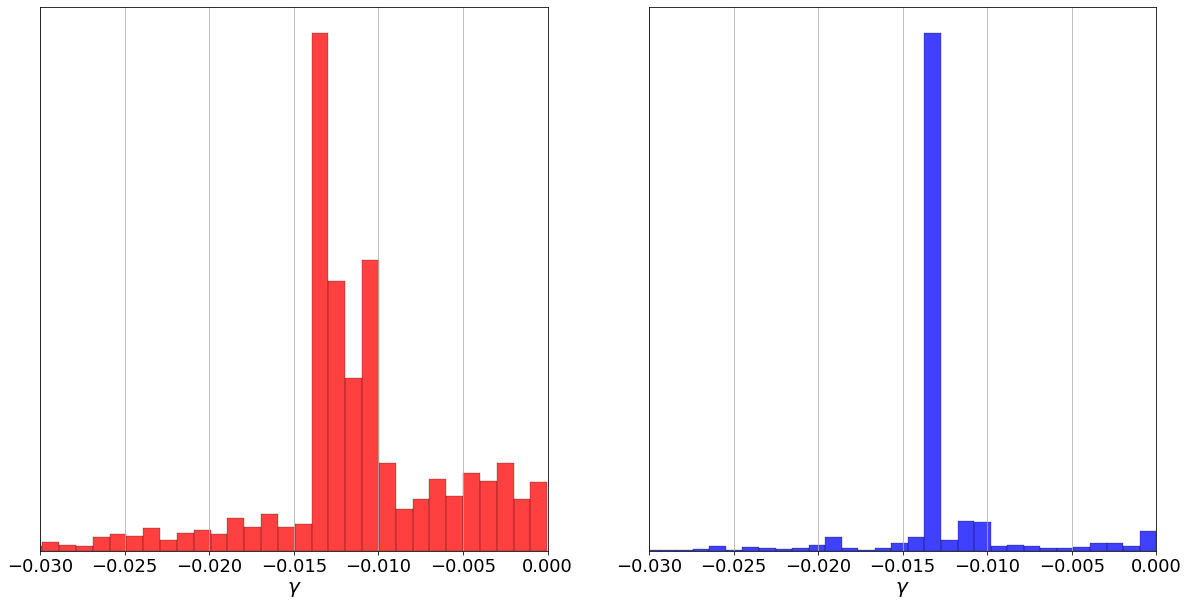

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
# fig.suptitle('Horizontally stacked subplots')
# df1 = pd.DataFrame(data1[:,3]).plot(kind='density', ax= ax)

# pd.DataFrame(data2[:,3]).plot(kind='density', ax= ax, label='genetic')

kdeplot = sns.histplot(data_le1[:,5], label='nested', ax=ax1, bins=200, color='red')
kdeplot = sns.histplot(data_le2[:,5], label='genetic', ax=ax2, bins=200, color='blue')

ax1.set_xlabel('$\gamma$', fontsize=20)
ax1.set_yticks([])
# change the fontsize
ax1.tick_params(axis='x', labelsize=18)
ax1.set_ylabel('')

ax2.set_xlabel('$\gamma$', fontsize=20)
ax2.set_yticks([])
ax2.tick_params(axis='x', labelsize=18)
ax2.set_ylabel('')

ax1.axis(xmin=-0.03, xmax=0.0)
ax2.axis(xmin=-0.03, xmax=0.0)

ax1.grid()
ax2.grid()
fig.savefig('histograms_graduated_DE.png', dpi=100)

In [24]:
mc_samp = mcsamples.loadMCSamples(dir_name_le + root_le, settings={'ignore_rows':0.2})
mcsamplefile = mc_samp
mcstats = mcsamplefile.getLikeStats()
summary = mcstats.likeSummary()
print(summary)
print("-2loglike: {:.8}".format(2*mcstats.logLike_sample))

/home/isidro/Documents/github/cosmo_tools/models/genetic_paper/chains_graduated_LE/Grad_nega_20_phy_Planck_15+BBAO+SN+HD_1.txt
Removed 0.2 as burn in
Best fit sample -log(Like) = 33.738400
Ln(mean 1/like) = 40.696631
mean(-Ln(like)) = 36.935180
-Ln(mean like)  = 35.790860

-2loglike: 67.4768


In [25]:
# samples = g.sampleAnalyser.samplesForRoot('Quintess_phy_SN+HD+CBAO_nested_multi')

p = mcsamplefile.getParams()
print('mean, err = ', mcsamplefile.mean(p.ggama), mcsamplefile.std(p.ggama))
print('95% limits: ',mcsamplefile.twoTailLimits(p.ggama, 0.95))
print(mcsamplefile.likeStats)

mean, err =  -0.01065830779180418 0.004260306716748013
95% limits:  [-0.0146812  -0.00097968]
Best fit sample -log(Like) = 33.738400
Ln(mean 1/like) = 40.696631
mean(-Ln(like)) = 36.935180
-Ln(mean like)  = 35.790860

parameter           bestfit        lower1         upper1         lower2         upper2
Om                  2.9783900E-01  3.1554400E-01  0.0000000E+00  3.2016500E-01  0.0000000E+00   \Omega_m*
Obh2                2.2198000E-02  2.2643400E-02 9.1815911E-316  2.2807500E-02  0.0000000E+00   \Omega_bh^2
h                   6.9280700E-01  7.0821700E-01  0.0000000E+00  7.1312400E-01  0.0000000E+00   h
ggama              -1.3201200E-02 -4.6111100E-06 1.1149237E-315 -2.0436500E-06  0.0000000E+00   \gamma
SPlanck_15_like    -1.1935800E+00 -1.4593400E-03  0.0000000E+00 -1.1114500E-03  0.0000000E+00   SPlanck_15
DR11LOWZ_like      -8.2683100E-04 -2.5330400E-08 1.0419167E-315 -3.7249000E-10  0.0000000E+00   DR11LOWZ
DR11CMASS_like     -1.9750500E+00 -1.1939400E+00  0.0000000E+00 -1.1